# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_sinasc = pd.read_csv('sinasc.csv', usecols = ['APGAR5', 'GESTACAO', 'SEXO','PESO'])
df_sinasc

,GESTACAO,SEXO,APGAR5,PESO
0,37 a 41 semanas,Masculino,10.0,3685
1,37 a 41 semanas,Feminino,9.0,3055
2,37 a 41 semanas,Feminino,10.0,3460
3,37 a 41 semanas,Feminino,10.0,2982
4,37 a 41 semanas,Feminino,10.0,3310
...,...,...,...,...
27023,32 a 36 semanas,Masculino,9.0,2110
27024,37 a 41 semanas,Masculino,9.0,3310
27025,37 a 41 semanas,Masculino,10.0,3065
27026,32 a 36 semanas,Masculino,9.0,2352


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
# categorizando apgar5

df_sinasc.loc[(df_sinasc['APGAR5'] >=0) & (df_sinasc['APGAR5'] <=3),'apgar5_cat'] = 'asfixia grave'
df_sinasc.loc[(df_sinasc['APGAR5'] >=4) & (df_sinasc['APGAR5'] <=5),'apgar5_cat'] = 'asfixia moderada'
df_sinasc.loc[(df_sinasc['APGAR5'] >=6) & (df_sinasc['APGAR5'] <=7),'apgar5_cat'] = 'asfixia leve'
df_sinasc.loc[(df_sinasc['APGAR5'] >=8) & (df_sinasc['APGAR5'] <=10),'apgar5_cat'] = 'normal'

df_sinasc['apgar5_cat'].value_counts()


normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: apgar5_cat, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

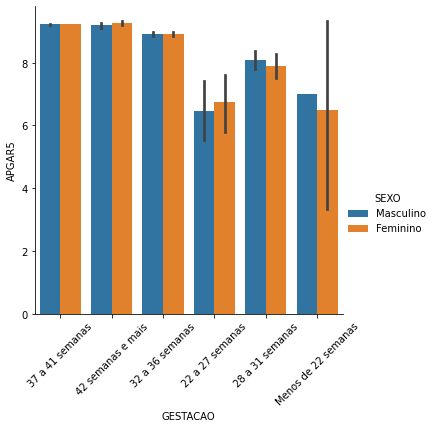

In [4]:
gf = sns.catplot(x='GESTACAO', y='APGAR5',hue='SEXO', kind='bar', data=df_sinasc)
gf.set_xticklabels(rotation=45);

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
freq = pd.crosstab(df_sinasc['GESTACAO'], df_sinasc['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
freq_pclin = freq.div(freq.sum(axis=1),axis=0)
freq_pclin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 576x360 with 0 Axes>

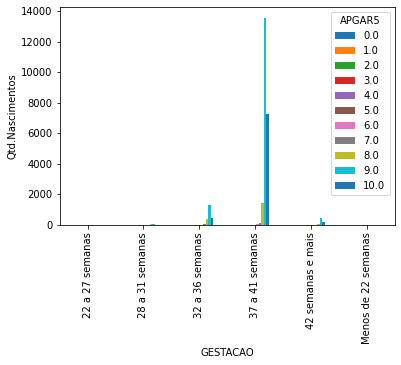

In [7]:
plt.figure(figsize=(8,5))
freq.plot.bar(ylabel = 'Qtd.Nascimentos');

Acredito que corrobora, pois neste conjunto de dados os nascimentos ocorrem em sua grande maioria entre a semana 37 e 41
mostrando que esse é o "periodo normal e seguro" para o nascimento, e todo nascimento que ocorre antes desse periodo pode
ser considerado como prematuro.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [8]:
df_sinasc.loc[df_sinasc['PESO']<=999, 'cat_peso'] = 'extremamente baixo'
df_sinasc.loc[(df_sinasc['PESO'] >=1000) & (df_sinasc['PESO'] <=1499),'cat_peso'] = 'muito baixo'
df_sinasc.loc[(df_sinasc['PESO'] >=1500) & (df_sinasc['PESO'] <=2499),'cat_peso'] = 'baixo'
df_sinasc.loc[(df_sinasc['PESO'] >=2500) & (df_sinasc['PESO'] <=2999),'cat_peso'] = 'insuficiente'
df_sinasc.loc[(df_sinasc['PESO'] >=3000) & (df_sinasc['PESO'] <=3999),'cat_peso'] = 'normal'
df_sinasc.loc[df_sinasc['PESO']>=3999, 'cat_peso'] = 'excessivo'

df_sinasc['cat_peso'].value_counts()

normal                18121
insuficiente           5422
excessivo              1599
baixo                  1579
muito baixo             175
extremamente baixo      132
Name: cat_peso, dtype: int64

In [9]:
freq1 = pd.crosstab(df_sinasc['cat_peso'], df_sinasc['APGAR5'])
freq1

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cat_peso,,,,,,,,,,,
baixo,2,3,2,2,5,7,11,46,284,959,241
excessivo,0,2,2,0,0,1,3,9,135,1023,423
extremamente baixo,9,1,10,6,3,7,2,20,37,30,6
insuficiente,2,3,1,2,2,7,12,39,407,3230,1693
muito baixo,0,2,2,1,6,5,10,9,55,67,13
normal,4,13,1,4,7,18,41,118,1076,10767,6017


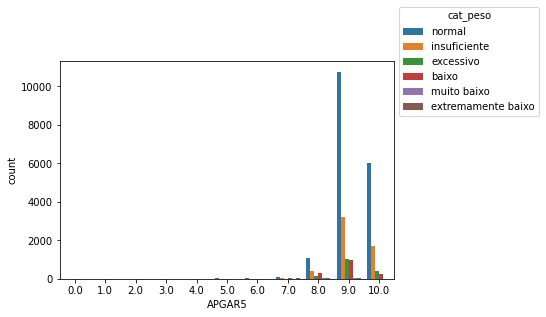

In [14]:
ax1 = sns.countplot(x='APGAR5', hue='cat_peso', data=df_sinasc)
sns.move_legend(ax1, 'center left', bbox_to_anchor=(1, 1))

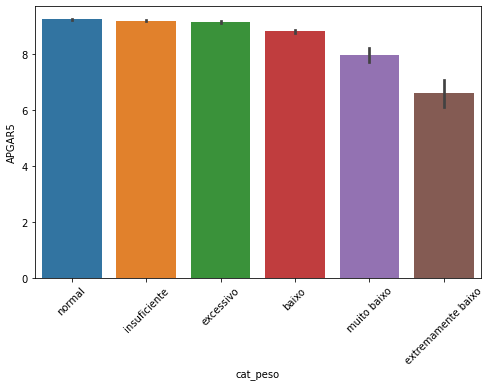

In [15]:
plt.figure(figsize=(8,5))

sns.barplot(x='cat_peso', y='APGAR5', data=df_sinasc)
plt.xticks(rotation=45);


Não há relação direta do APGAR5 com o peso do bebe, pois mesmo quem nasce com peso insuficiente consegue ter um apgar bom.